In [50]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

%matplotlib inline

In [185]:
markers = {0:'o',1:'x'}
def plot_data(ax, X, y, feature_names, color = 'k', label = 'data'):
    axis_max = abs(X).max().round() + 1
    ax.scatter(X[y==1, 0], X[y==1, 1],marker='+', c=color, s=50, label = label + ' 1')
    ax.scatter(X[y==0, 0], X[y==0, 1],marker='o', s=50, edgecolors=color, facecolors = 'none', label = label + ' 0')
    ax.set_xlim(-axis_max, axis_max)
    ax.set_ylim(-axis_max, axis_max)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title('Data')

def plot_decision_boundaries(ax, X, y, clf, feature_names, resolution=0.01):
    # Plot the decision surface
    axis_max = abs(X).max().round() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(-axis_max, axis_max, resolution),
                           np.arange(-axis_max, axis_max, resolution))
    Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
    ax.contourf(xx1, xx2, Z, alpha=0.4)
    
    # Plot class sample
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')
    
    ax.set_xlim(-axis_max, axis_max)
    ax.set_ylim(-axis_max, axis_max)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(clf.__class__.__name__)

In [186]:
def get_2d(n_samples, scale = 2, noise = 0):
    x = np.random.rand(2*n_samples, 2) * scale - scale/2
    y = (x[:,0]>x[:, 1]).astype(int)
    if noise > 0:
        x = x + np.random.normal(0,noise,size=x.shape)
    return x, y

# Train - Test

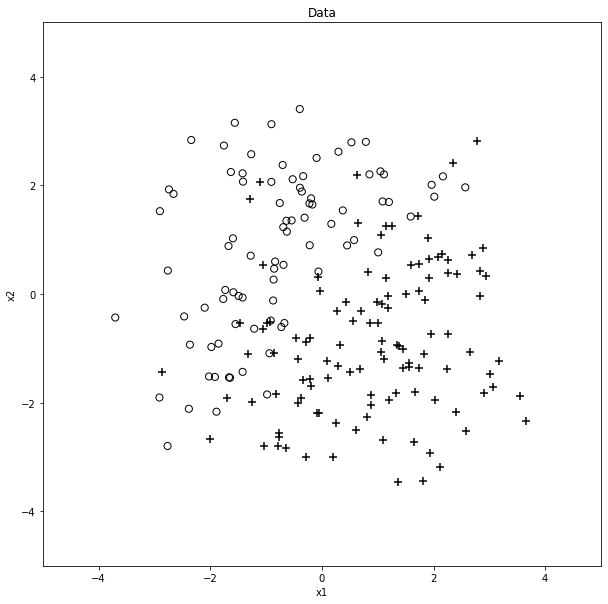

In [187]:
n_samples = 100

x, y = get_2d(n_samples,scale = 5, noise = 0.7)
plt.figure(figsize=(10, 10))
ax = plt.subplot()
plot_data(ax, x, y, ['x1','x2'],color='k')

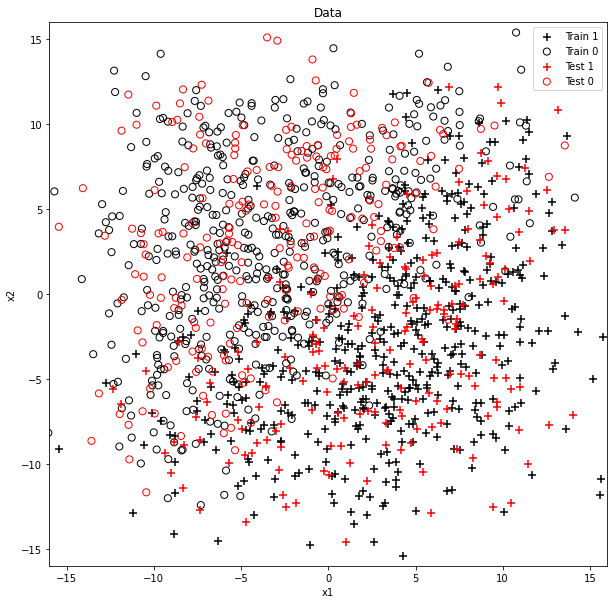

In [188]:
n_train = 500
n_test = 200

x_train, y_train = get_2d(n_train,scale = 20, noise = 3)
plt.figure(figsize=(10, 10))
ax = plt.subplot()
plot_data(ax, x_train, y_train, ['x1','x2'],color='k',label = 'Train')
x_test, y_test = get_2d(n_test,scale = 20,noise = 3)
plot_data(ax, x_test, y_test, ['x1','x2'],color='r', label = 'Test')
plt.legend()

In [189]:
scores = {}

## Decision Tree

Tree: Train accuracy=0.847, Test accuracy=0.825


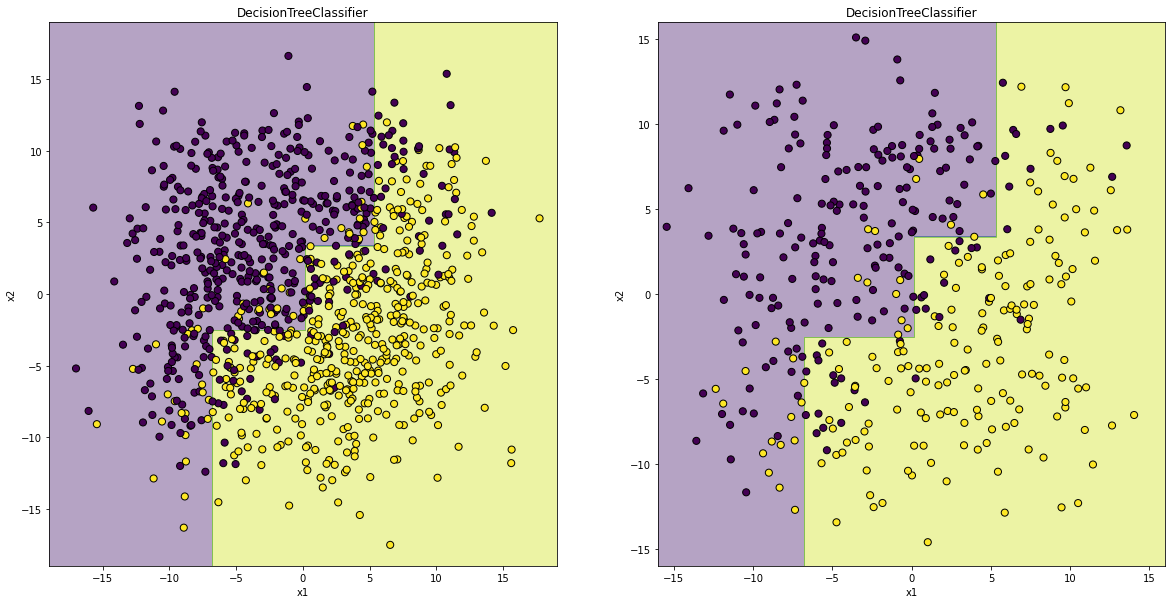

In [190]:
model_name = 'DT-3'
classifier = DecisionTreeClassifier(random_state=0,max_depth=3)
classifier.fit(x_train, y_train)
plt.figure(figsize=(20,10))
ax = plt.subplot(1,2,1)
plot_decision_boundaries(ax,x_train, y_train, classifier, ['x1','x2'])
ax = plt.subplot(1,2,2)
plot_decision_boundaries(ax,x_test, y_test, classifier, ['x1','x2'])
print(f'Tree: Train accuracy={classifier.score(x_train, y_train)}, Test accuracy={classifier.score(x_test, y_test)}')
scores[model_name] = {'train':classifier.score(x_train,y_train), 'test':classifier.score(x_test,y_test)}

Tree: Train accuracy=1.0, Test accuracy=0.8075


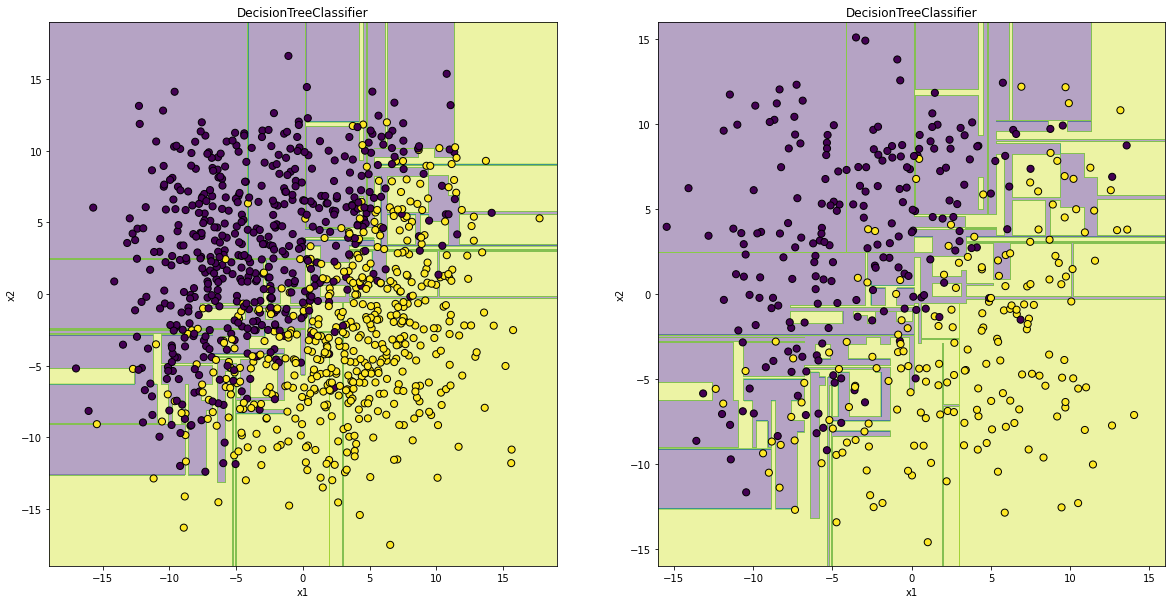

In [191]:
model_name = 'DT-full'
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train, y_train)
plt.figure(figsize=(20,10))
ax = plt.subplot(1,2,1)
plot_decision_boundaries(ax,x_train, y_train, classifier, ['x1','x2'])
ax = plt.subplot(1,2,2)
plot_decision_boundaries(ax,x_test, y_test, classifier, ['x1','x2'])
print(f'Tree: Train accuracy={classifier.score(x_train, y_train)}, Test accuracy={classifier.score(x_test, y_test)}')
scores[model_name] = {'train':classifier.score(x_train,y_train), 'test':classifier.score(x_test,y_test)}

## Random Forest

Random Forest: Train accuracy=1.0, Test accuracy=0.8425


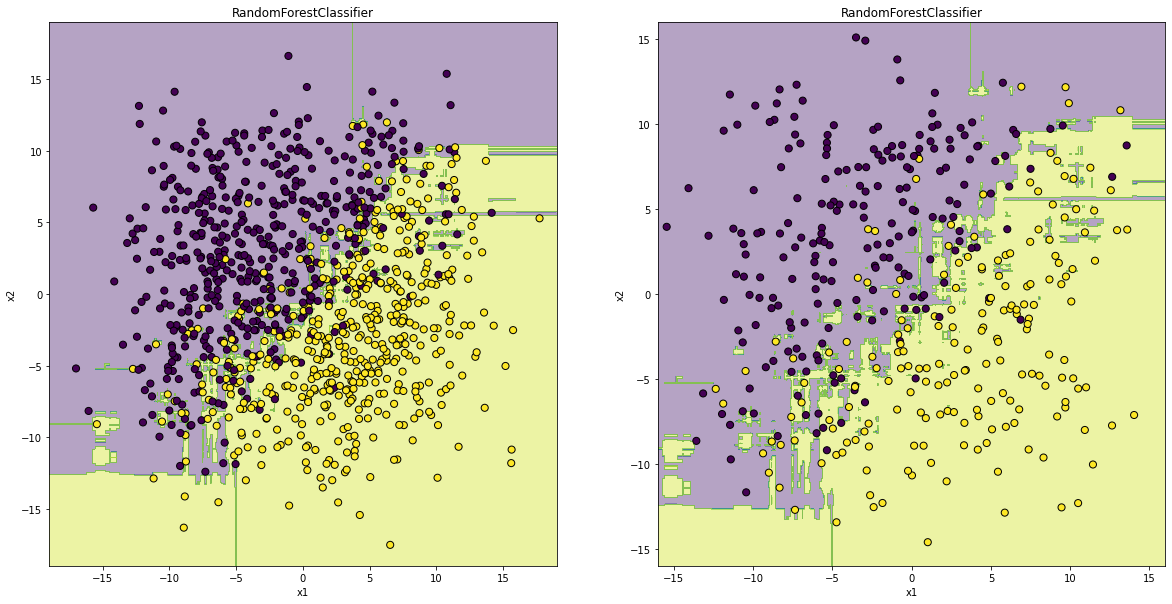

In [192]:
model_name = 'RF'
classifier = RandomForestClassifier(random_state=0, n_estimators=50)
classifier.fit(x_train, y_train)
plt.figure(figsize=(20,10))
ax = plt.subplot(1,2,1)
plot_decision_boundaries(ax,x_train, y_train, classifier, ['x1','x2'])
ax = plt.subplot(1,2,2)
plot_decision_boundaries(ax,x_test, y_test, classifier, ['x1','x2'])
print(f'Random Forest: Train accuracy={classifier.score(x_train, y_train)}, Test accuracy={classifier.score(x_test, y_test)}')
scores[model_name] = {'train':classifier.score(x_train,y_train), 'test':classifier.score(x_test,y_test)}

## AdaBoost

AdaBoost: Train accuracy=0.896, Test accuracy=0.8425


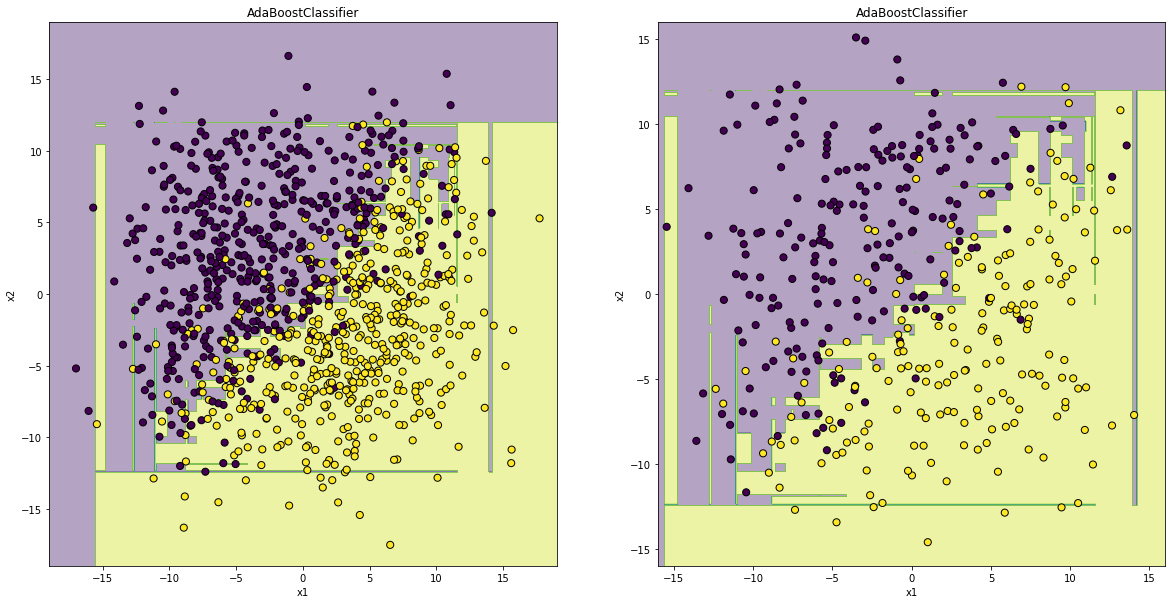

In [193]:
model_name = 'AdaBoost'
base_estimator = DecisionTreeClassifier(max_depth=1)
classifier = AdaBoostClassifier(random_state=0, n_estimators=200, base_estimator=base_estimator)
classifier.fit(x_train, y_train)
plt.figure(figsize=(20,10))
ax = plt.subplot(1,2,1)
plot_decision_boundaries(ax,x_train, y_train, classifier, ['x1','x2'])
ax = plt.subplot(1,2,2)
plot_decision_boundaries(ax,x_test, y_test, classifier, ['x1','x2'])
print(f'AdaBoost: Train accuracy={classifier.score(x_train, y_train)}, Test accuracy={classifier.score(x_test, y_test)}')
scores[model_name] = {'train':classifier.score(x_train,y_train), 'test':classifier.score(x_test,y_test)}

Gradient Boosting: Train accuracy=0.958, Test accuracy=0.8425


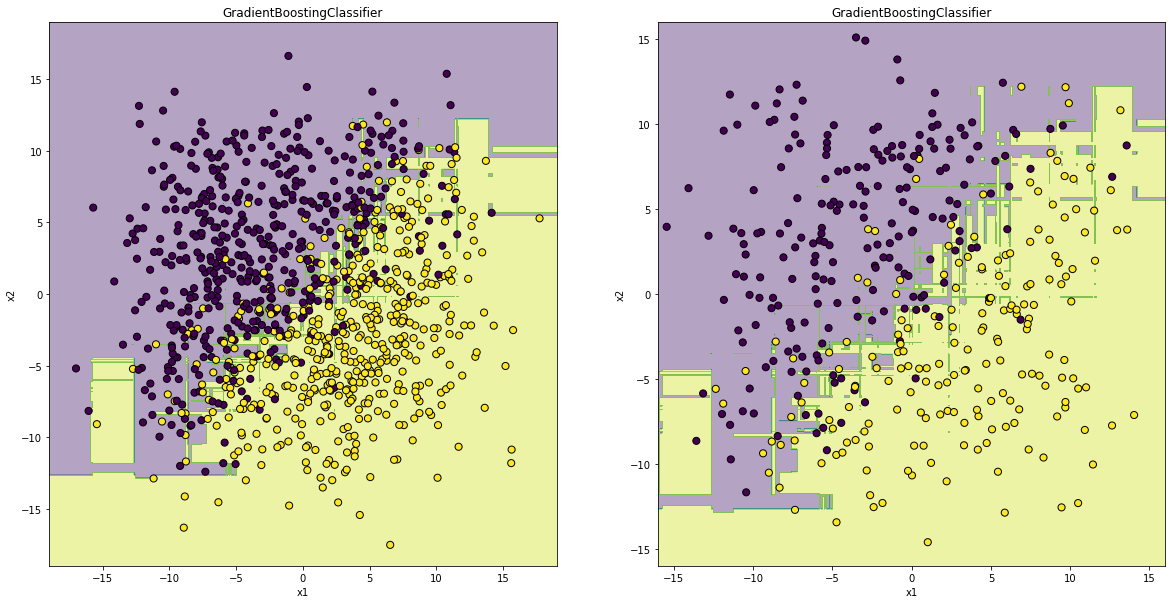

In [194]:
model_name = 'GradientBoosting'
classifier = GradientBoostingClassifier(random_state=0, n_estimators=200)
classifier.fit(x_train, y_train)
plt.figure(figsize=(20,10))
ax = plt.subplot(1,2,1)
plot_decision_boundaries(ax,x_train, y_train, classifier, ['x1','x2'])
ax = plt.subplot(1,2,2)
plot_decision_boundaries(ax,x_test, y_test, classifier, ['x1','x2'])
print(f'Gradient Boosting: Train accuracy={classifier.score(x_train, y_train)}, Test accuracy={classifier.score(x_test, y_test)}')
scores[model_name] = {'train':classifier.score(x_train,y_train), 'test':classifier.score(x_test,y_test)}

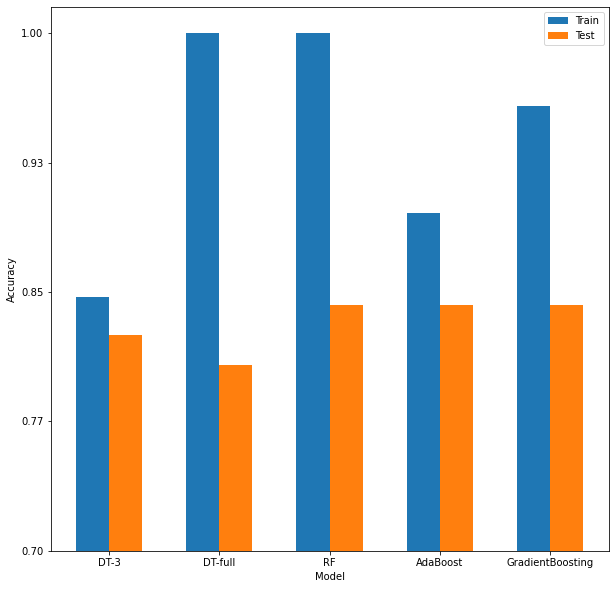

In [198]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
t = np.arange(len(scores))
shift = 0.7
ax.bar(t,[s['train']-shift for s in scores.values()],width = 0.3,label = 'Train')
ax.bar(t+0.3,[s['test']-shift for s in scores.values()],width = 0.3,label = 'Test')
ax.set_xticks(t+0.15)
ax.set_xticklabels(scores.keys())
ax.set_yticks(np.linspace(0,1-shift,num=5))
ax.set_yticklabels([f'{v:.2f}' for v in np.linspace(shift,1,num=5)])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.legend()

In [199]:
scores

{'DT-3': {'train': 0.847, 'test': 0.825},
 'DT-full': {'train': 1.0, 'test': 0.8075},
 'RF': {'train': 1.0, 'test': 0.8425},
 'AdaBoost': {'train': 0.896, 'test': 0.8425},
 'GradientBoosting': {'train': 0.958, 'test': 0.8425}}

In [200]:
scoresDT = {}
for depth in range(1,15):
    model_name = 'DT-' + str(depth)
    classifier = DecisionTreeClassifier(random_state=0,max_depth=depth)
    classifier.fit(x_train, y_train)
    scoresDT[depth] = {'train':classifier.score(x_train,y_train), 'test':classifier.score(x_test,y_test)}

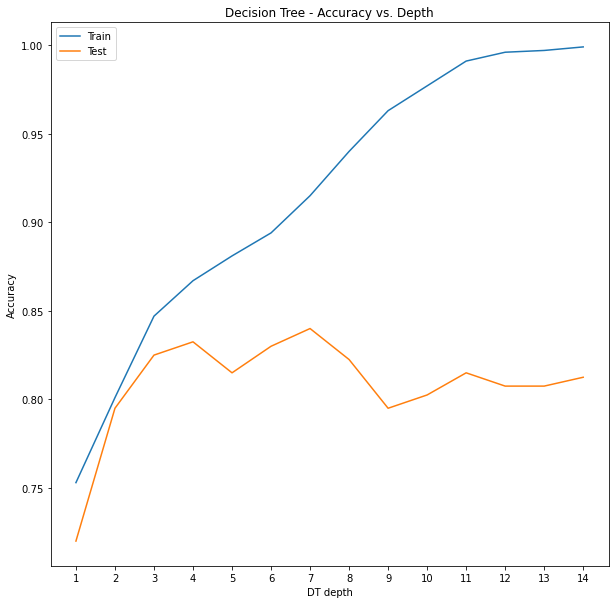

In [201]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
t = list(scoresDT.keys())
ax.plot(t,[s['train'] for s in scoresDT.values()],label = 'Train')
ax.plot(t,[s['test'] for s in scoresDT.values()],label = 'Test')
ax.set_xticks(t)
ax.set_xticklabels(scoresDT.keys())
# ax.set_yticks(np.linspace(0,1-shift,num=5))
# ax.set_yticklabels([f'{v:.2f}' for v in np.linspace(shift,1,num=5)])
ax.set_xlabel('DT depth')
ax.set_ylabel('Accuracy')
ax.set_title('Decision Tree - Accuracy vs. Depth')
plt.legend()

In [202]:
scoresRF = {}
for trees in range(1,15):
    model_name = 'RF-' + str(trees)
    classifier = RandomForestClassifier(random_state=0, n_estimators=trees)
    classifier.fit(x_train, y_train)
    scoresRF[trees] = {'train':classifier.score(x_train,y_train), 'test':classifier.score(x_test,y_test)}

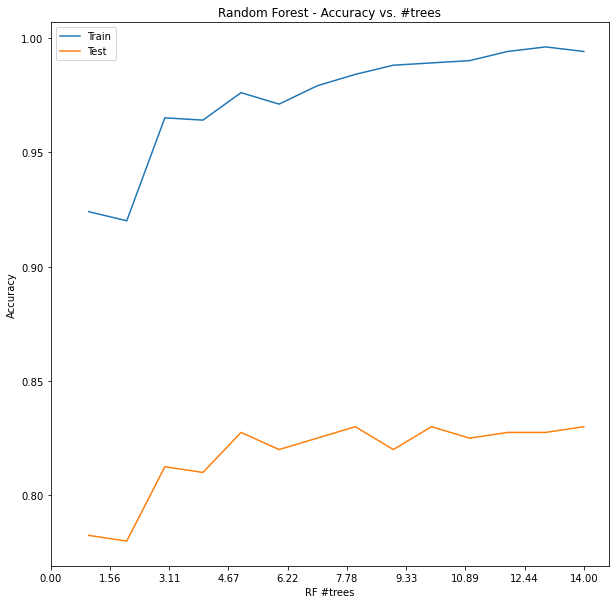

In [203]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
t = np.linspace(0,max(scoresRF.keys()),10)
shift = 0.9
ax.plot(scoresRF.keys(),[s['train'] for s in scoresRF.values()],label = 'Train')
ax.plot(scoresRF.keys(),[s['test'] for s in scoresRF.values()],label = 'Test')
ax.set_xticks(t)
# ax.set_yticks(np.linspace(0,1-shift,num=5))
# ax.set_yticklabels([f'{v:.2f}' for v in np.linspace(shift,1,num=5)])
ax.set_xlabel('RF #trees')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest - Accuracy vs. #trees')
plt.legend()

In [214]:
scoresAda = {}
for trees in range(1,101):
    model_name = 'Ada-' + str(trees)
    base_estimator = DecisionTreeClassifier(max_depth=1)
    classifier = AdaBoostClassifier(random_state=0, n_estimators=trees, base_estimator=base_estimator)
    classifier.fit(x_train,y_train)
    scoresAda[trees] = {'train':classifier.score(x_train,y_train), 'test':classifier.score(x_test,y_test)}

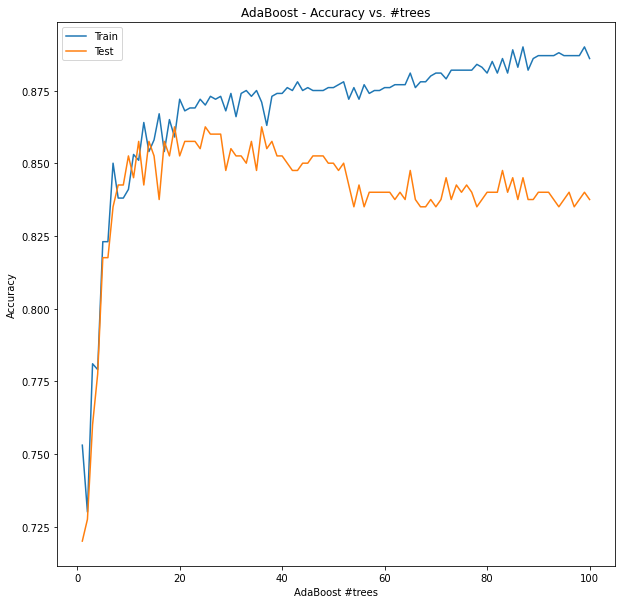

In [216]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
t = list(scoresAda.keys())
shift = 0.7
ax.plot(scoresAda.keys(),[s['train'] for s in scoresAda.values()],label = 'Train')
ax.plot(scoresAda.keys(),[s['test'] for s in scoresAda.values()],label = 'Test')
# ax.set_xticks(t)
# ax.set_yticks(np.linspace(0,1-shift,num=5))
# ax.set_yticklabels([f'{v:.2f}' for v in np.linspace(shift,1,num=5)])
ax.set_xlabel('AdaBoost #trees')
ax.set_ylabel('Accuracy')
ax.set_title('AdaBoost - Accuracy vs. #trees')
plt.legend()

In [210]:
scoresAda = {}
for trees in list(range(1,100,3))+list(range(100,1001,100)):
    model_name = 'Ada-' + str(trees)
    base_estimator = DecisionTreeClassifier(max_depth=1)
    classifier = AdaBoostClassifier(random_state=0, n_estimators=trees, base_estimator=base_estimator)
    classifier.fit(x_train,y_train)
    scoresAda[trees] = {'train':classifier.score(x_train,y_train), 'test':classifier.score(x_test,y_test)}

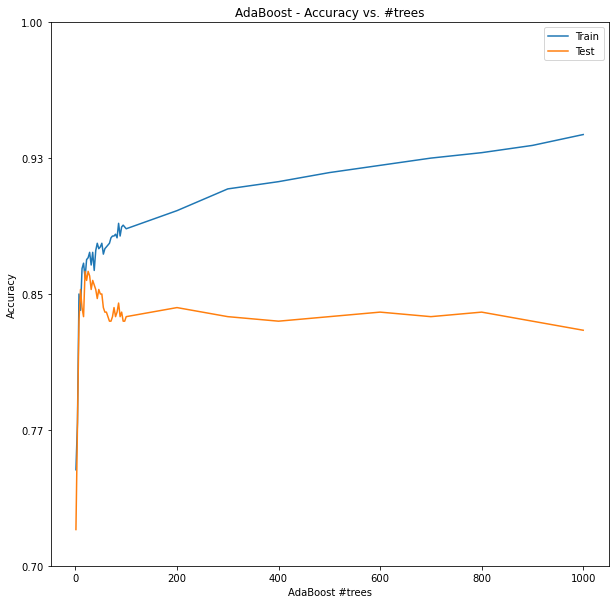

In [211]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
t = list(scoresAda.keys())
shift = 0.7
ax.plot(t,[s['train']-shift for s in scoresAda.values()],label = 'Train')
ax.plot(t,[s['test']-shift for s in scoresAda.values()],label = 'Test')
# ax.set_xticks(range(0,scoresAda.keys(),100))
ax.set_yticks(np.linspace(0,1-shift,num=5))
ax.set_yticklabels([f'{v:.2f}' for v in np.linspace(shift,1,num=5)])
ax.set_xlabel('AdaBoost #trees')
ax.set_ylabel('Accuracy')
ax.set_title('AdaBoost - Accuracy vs. #trees')
plt.legend()